In [2]:
# Let's import the needed packages for further use ! 
import sys,os

import numpy as np
import matplotlib.pyplot as plt
import pickle
# %matplotlib notebook

plt.ioff()

import actynf

# A few helper functions ...
from tools import clever_running_mean
from tools import save_output,extract_training_data

# Loading the experimental measures !
from load_data import load_eeg_scores_xp1


# A FEW CONSTANTS : 
XP1_DATA_PATH = os.path.join("..","..","data","xp1")

# The relative paths of our simulated results and figures : 
SAVING_FOLDER = os.path.join("..","..","simulation_outputs","paper_graz","4_cluster")
FIGURES_FOLDER = os.path.join("figures")




(21, 21, 10, 400, 2, 40)
(21, 21, 10, 400, 3, 40)
(21, 21, 10, 400, 2, 40)
(21, 21, 10, 400, 3, 40)
(21, 21, 3)
(21, 21, 10, 400, 3, 40)
(21, 21, 3)
(21, 21, 10, 400, 3, 40)


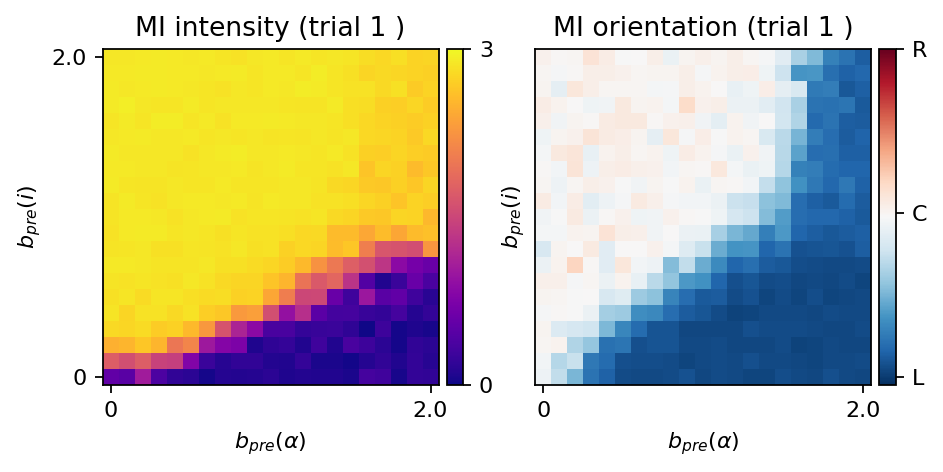

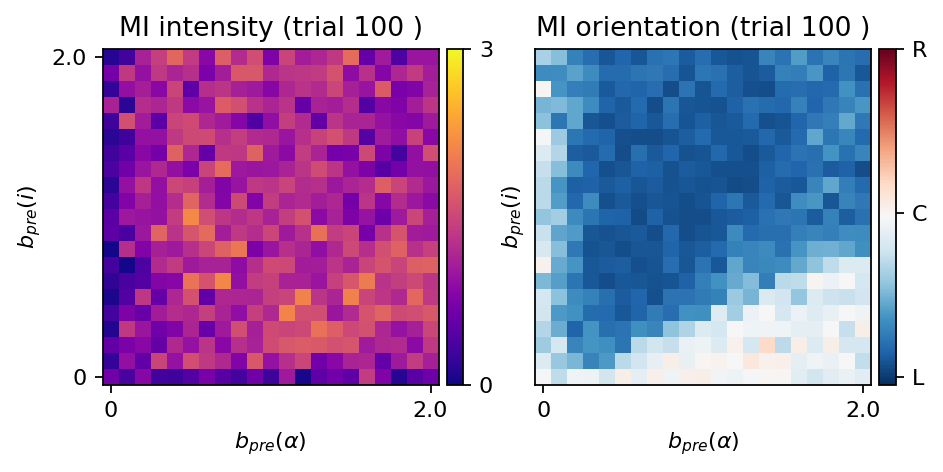

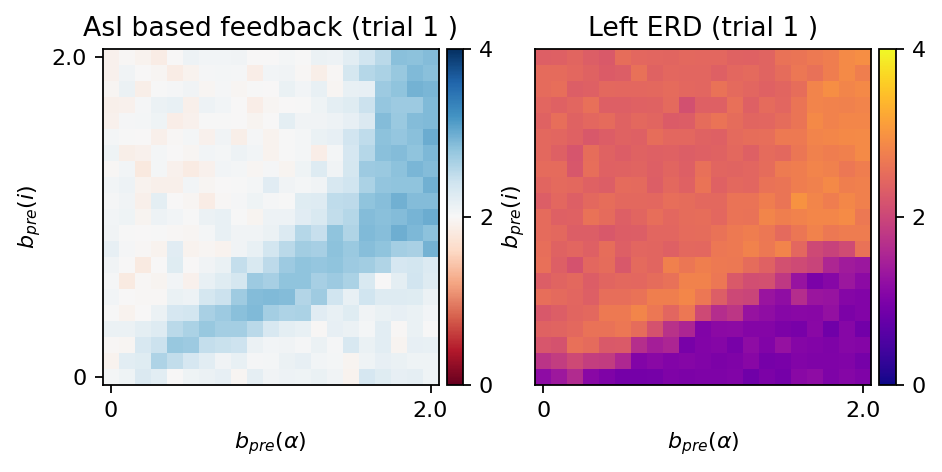

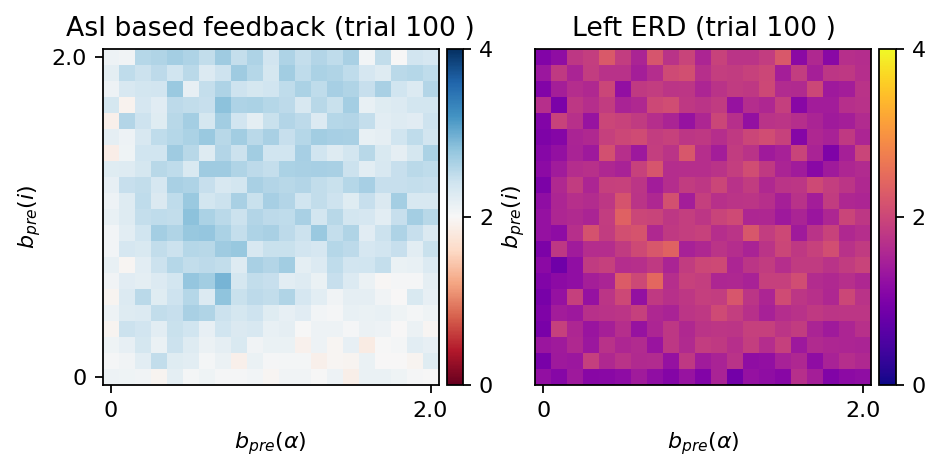

In [53]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


reduced_perf_path = os.path.join(SAVING_FOLDER,"reduced_states_observations")

if not(os.path.exists(reduced_perf_path)):
    ## Open :
    simulation_parameters_path = os.path.join(SAVING_FOLDER,"KEYS")
    with open(simulation_parameters_path, 'rb') as handle:
            simulation_parameters = pickle.load(handle)

    simulation_performances_path = os.path.join(SAVING_FOLDER,"PERFS")
    with open(simulation_performances_path, 'rb') as handle:
            simulation_performances = pickle.load(handle)

    # params = simulation_parameters[:,:,0,:2]
    states = simulation_performances['s']
    feedbacks = simulation_performances['o']
    # simulation_performances['a'][:,:,k1a,:],
    # simulation_performances['b'][:,:,k1a,:],

    def save_object_to(obj,savepath,override=True):
        if not os.path.exists(os.path.dirname(savepath)):
            os.makedirs(os.path.dirname(savepath))

        exists = os.path.isfile(savepath)
        if (not(exists)) or (override):
            print("Saving to " + savepath)
                
            with open(savepath, 'wb') as handle:
                pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)
            print("Saved to :   " + savepath)

    save_object_to({"states":states,"feedbacks":feedbacks},reduced_perf_path)

with open(reduced_perf_path, 'rb') as handle:
    sim_results = pickle.load(handle)

fbs = sim_results["feedbacks"]
states = sim_results["states"]


trials = [1,199]
for trial in trials:
    trial_aff = int((trial-1)/2)+1

    mean_of_last_trials = np.mean(states[:,:,:,trial,:,:],axis=(2,4))
    print(states.shape)
    print(fbs.shape)


    
    fig = plt.figure(dpi=160)

    ax1 = fig.add_subplot(121)

    colormap = "plasma"
    im1 = ax1.imshow(mean_of_last_trials[:,:,0], interpolation='None',vmin=0,vmax=3,cmap=colormap)
    ax1.set_xlabel("$b_{pre}(\\alpha)$")
    ax1.set_xticks([0,20])
    ax1.set_xticklabels([0,2.0])
    ax1.set_ylabel("$b_{pre}(i)$")
    ax1.set_yticks([0,20])
    ax1.set_yticklabels([0,2.0])
    ax1.invert_yaxis()
    ax1.set_title("MI intensity (trial "  + str(trial_aff) + " )")

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, orientation='vertical', ticks=[0, 3])

    ax2 = fig.add_subplot(122)

    colormap = "RdBu_r"
    im2 = ax2.imshow(mean_of_last_trials[:,:,1], interpolation='None',vmin=4,vmax=0,cmap=colormap)
    ax2.set_xlabel("$b_{pre}(\\alpha)$")
    ax2.set_xticks([0,20])
    ax2.set_xticklabels([0,2.0])
    ax2.set_ylabel("$b_{pre}(i)$")
    ax2.set_yticks([])
    ax2.set_yticklabels([])
    ax2.invert_yaxis()
    ax2.set_title("MI orientation (trial "  + str(trial_aff) + " )")

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im2, cax=cax, orientation='vertical', ticks=[0, 2, 4])
    cbar.ax.set_yticklabels(['L', 'C', 'R'])

trials = [1,199]
for trial in trials:
    trial_aff = int((trial-1)/2)+1

    mean_of_last_trials = np.mean(fbs[:,:,:,trial,:,:],axis=(2,4))
    print(mean_of_last_trials.shape)
    print(fbs.shape)


    
    fig = plt.figure(dpi=160)

    ax1 = fig.add_subplot(121)

    colormap = "RdBu"
    im1 = ax1.imshow(mean_of_last_trials[:,:,0], interpolation='None',vmin=0,vmax=4,cmap=colormap)
    ax1.set_xlabel("$b_{pre}(\\alpha)$")
    ax1.set_xticks([0,20])
    ax1.set_xticklabels([0,2.0])
    ax1.set_ylabel("$b_{pre}(i)$")
    ax1.set_yticks([0,20])
    ax1.set_yticklabels([0,2.0])
    ax1.invert_yaxis()
    ax1.set_title("AsI based feedback (trial "  + str(trial_aff) + " )")

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, orientation='vertical', ticks=[0,2, 4])

    ax2 = fig.add_subplot(122)

    colormap = "plasma"
    im2 = ax2.imshow(mean_of_last_trials[:,:,1], interpolation='None',vmin=0,vmax=4,cmap=colormap)
    ax2.set_xlabel("$b_{pre}(\\alpha)$")
    ax2.set_xticks([0,20])
    ax2.set_xticklabels([0,2.0])
    ax2.set_ylabel("$b_{pre}(i)$")
    ax2.set_yticks([])
    ax2.set_yticklabels([])
    ax2.invert_yaxis()
    ax2.set_title("Left ERD (trial "  + str(trial_aff) + " )")

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im2, cax=cax, orientation='vertical', ticks=[0, 2, 4])
    # cbar.ax.set_yticklabels(['L', 'C', 'R'])

(21, 21, 40)
(21, 21, 10, 400, 3, 40)
(21, 21, 40)
(21, 21, 10, 400, 3, 40)


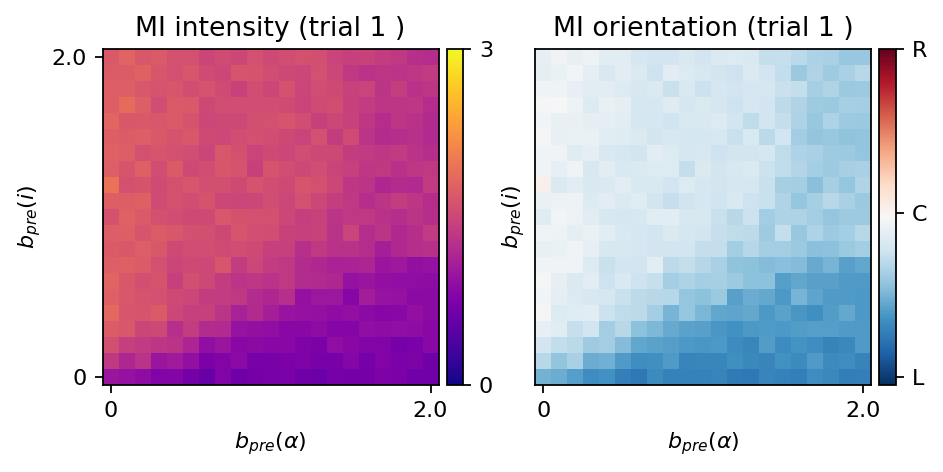

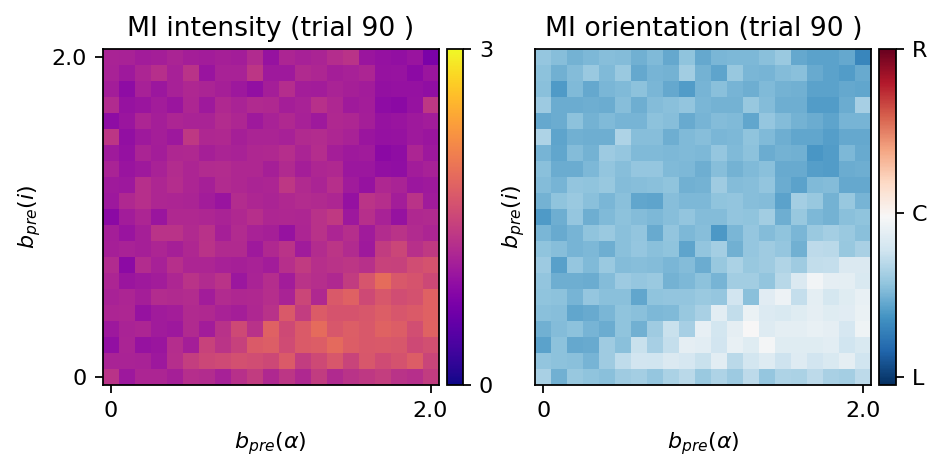

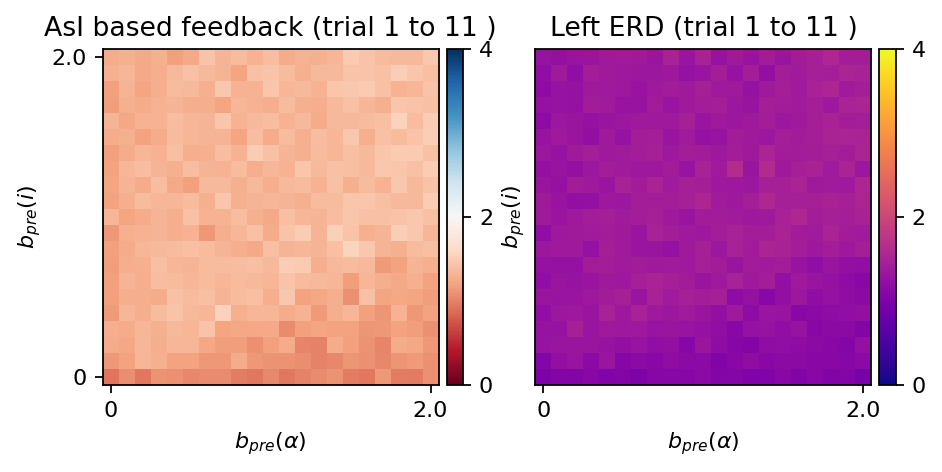

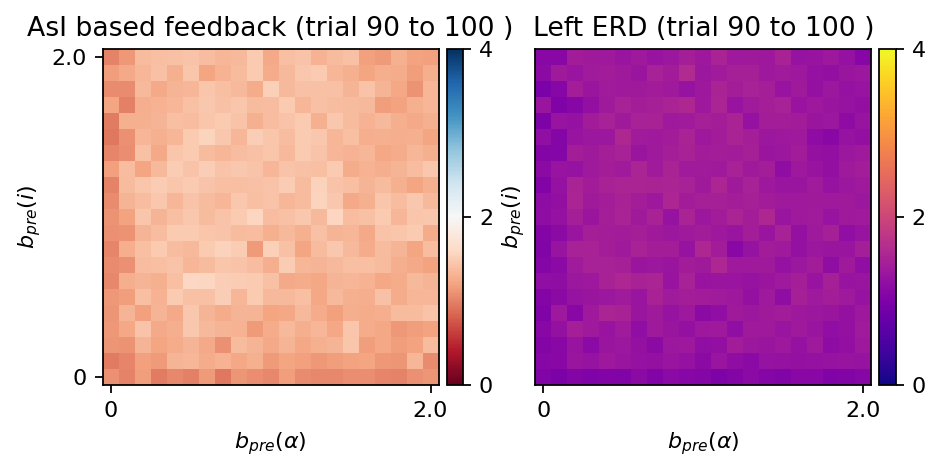

In [56]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


reduced_perf_path = os.path.join(SAVING_FOLDER,"reduced_states_observations")

if not(os.path.exists(reduced_perf_path)):
    ## Open :
    simulation_parameters_path = os.path.join(SAVING_FOLDER,"KEYS")
    with open(simulation_parameters_path, 'rb') as handle:
            simulation_parameters = pickle.load(handle)

    simulation_performances_path = os.path.join(SAVING_FOLDER,"PERFS")
    with open(simulation_performances_path, 'rb') as handle:
            simulation_performances = pickle.load(handle)

    # params = simulation_parameters[:,:,0,:2]
    states = simulation_performances['s']
    feedbacks = simulation_performances['o']
    # simulation_performances['a'][:,:,k1a,:],
    # simulation_performances['b'][:,:,k1a,:],

    def save_object_to(obj,savepath,override=True):
        if not os.path.exists(os.path.dirname(savepath)):
            os.makedirs(os.path.dirname(savepath))

        exists = os.path.isfile(savepath)
        if (not(exists)) or (override):
            print("Saving to " + savepath)
                
            with open(savepath, 'wb') as handle:
                pickle.dump(obj, handle, protocol=pickle.HIGHEST_PROTOCOL)
            print("Saved to :   " + savepath)

    save_object_to({"states":states,"feedbacks":feedbacks},reduced_perf_path)

with open(reduced_perf_path, 'rb') as handle:
    sim_results = pickle.load(handle)

fbs = sim_results["feedbacks"]
states = sim_results["states"]

only_active_fb = []
only_active_state = []
Ntrials = fbs.shape[3]
for trial in range(Ntrials):
    if not(trial % 2 == 0):
        only_active_fb.append(fbs[:,:,:,trial,:,:])
        only_active_state.append(states[:,:,:,trial,:,:])
only_active_fb = np.array(only_active_fb)
only_active_state = np.array(only_active_state)

trials = [0,89]
for trial in trials:
    trial_aff = str(int(trial)+1) + " to " + str(int(trial)+10)

    mean_of_last_trials = np.mean(states[:,:,:,trial:trial+10,:,:],axis=(2,3,4))
    
    fig = plt.figure(dpi=160)

    ax1 = fig.add_subplot(121)

    colormap = "plasma"
    im1 = ax1.imshow(mean_of_last_trials[:,:,0], interpolation='None',vmin=0,vmax=3,cmap=colormap)
    ax1.set_xlabel("$b_{pre}(\\alpha)$")
    ax1.set_xticks([0,20])
    ax1.set_xticklabels([0,2.0])
    ax1.set_ylabel("$b_{pre}(i)$")
    ax1.set_yticks([0,20])
    ax1.set_yticklabels([0,2.0])
    ax1.invert_yaxis()
    ax1.set_title("MI intensity (trials "  + str(trial_aff) + " )")

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, orientation='vertical', ticks=[0, 3])

    ax2 = fig.add_subplot(122)

    colormap = "RdBu_r"
    im2 = ax2.imshow(mean_of_last_trials[:,:,1], interpolation='None',vmin=4,vmax=0,cmap=colormap)
    ax2.set_xlabel("$b_{pre}(\\alpha)$")
    ax2.set_xticks([0,20])
    ax2.set_xticklabels([0,2.0])
    ax2.set_ylabel("$b_{pre}(i)$")
    ax2.set_yticks([])
    ax2.set_yticklabels([])
    ax2.invert_yaxis()
    ax2.set_title("MI orientation (trials "  + str(trial_aff) + " )")

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im2, cax=cax, orientation='vertical', ticks=[0, 2, 4])
    cbar.ax.set_yticklabels(['L', 'C', 'R'])

for trial in trials:
    trial_aff = str(int(trial)+1) + " to " + str(int(trial)+10)

    mean_of_last_trials = np.mean(fbs[:,:,:,trial:trial+10,:,:],axis=(2,3,4))
    print(mean_of_last_trials.shape)
    print(fbs.shape)


    
    fig = plt.figure(dpi=160)

    ax1 = fig.add_subplot(121)

    colormap = "RdBu"
    im1 = ax1.imshow(mean_of_last_trials[:,:,0], interpolation='None',vmin=0,vmax=4,cmap=colormap)
    ax1.set_xlabel("$b_{pre}(\\alpha)$")
    ax1.set_xticks([0,20])
    ax1.set_xticklabels([0,2.0])
    ax1.set_ylabel("$b_{pre}(i)$")
    ax1.set_yticks([0,20])
    ax1.set_yticklabels([0,2.0])
    ax1.invert_yaxis()
    ax1.set_title("AsI based feedback (trials "  + str(trial_aff) + " )")

    divider = make_axes_locatable(ax1)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im1, cax=cax, orientation='vertical', ticks=[0,2, 4])

    ax2 = fig.add_subplot(122)

    colormap = "plasma"
    im2 = ax2.imshow(mean_of_last_trials[:,:,1], interpolation='None',vmin=0,vmax=4,cmap=colormap)
    ax2.set_xlabel("$b_{pre}(\\alpha)$")
    ax2.set_xticks([0,20])
    ax2.set_xticklabels([0,2.0])
    ax2.set_ylabel("$b_{pre}(i)$")
    ax2.set_yticks([])
    ax2.set_yticklabels([])
    ax2.invert_yaxis()
    ax2.set_title("Left ERD (trials "  + str(trial_aff) + " )")

    divider = make_axes_locatable(ax2)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    cbar = fig.colorbar(im2, cax=cax, orientation='vertical', ticks=[0, 2, 4])
    # cbar.ax.set_yticklabels(['L', 'C', 'R'])